In [1]:
from sklearn.datasets import load_breast_cancer # Importer la fonction pour charger le jeu de données
import pandas as pd  # Importer pandas pour manipuler les DataFrames

In [3]:
# Charger le jeu de données
data = load_breast_cancer()

In [5]:
# Créer un DataFrame avec les caractéristiques et les cibles
df = pd.DataFrame(data.data, columns=data.feature_names)
# Ajouter la colonne cible au DataFrame
df['target'] = data.target

In [7]:
 # Afficher les premières lignes du DataFrame pour vérification
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
import seaborn as sns # Importer seaborn pour la visualisation
import matplotlib.pyplot as plt # Importer matplotlib pour tracer les graphiques

In [11]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

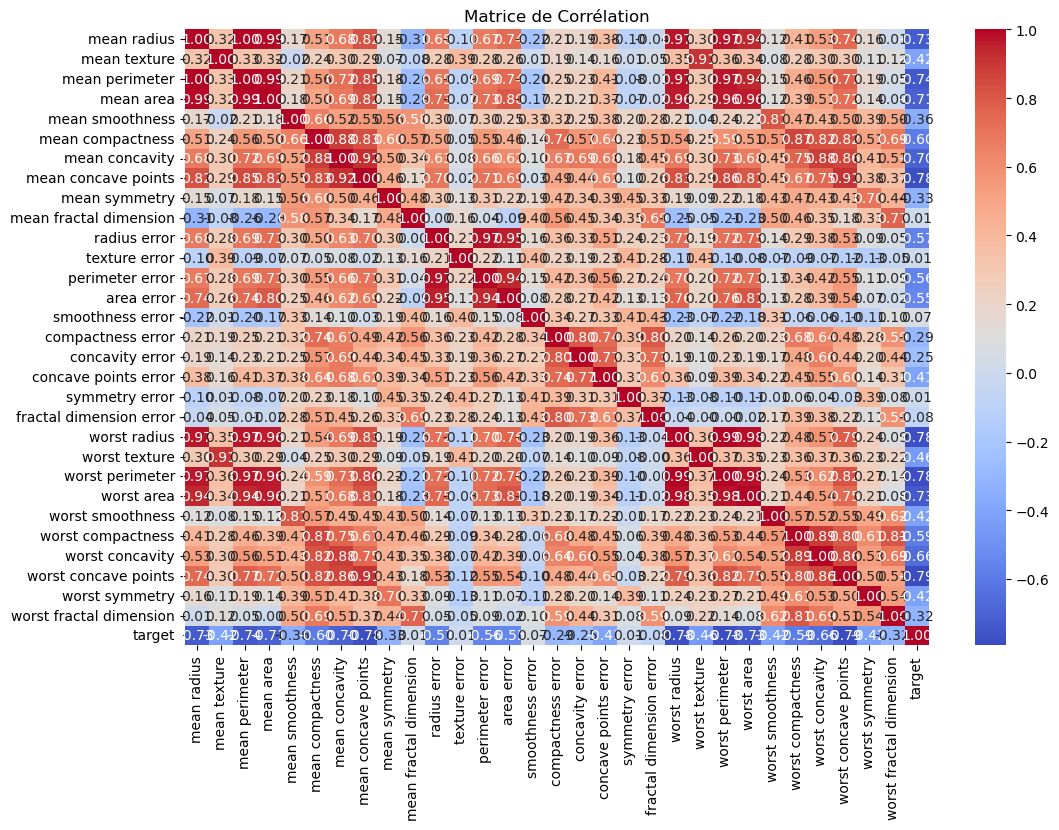

In [15]:
# Visualiser la matrice de corrélation avec un heatmap
plt.figure(figsize=(12, 8)) # Définir la taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Créer un heatmap avec annotations
plt.title("Matrice de Corrélation") # Ajouter un titre au graphique
plt.show() # Afficher le graphique

In [19]:
from sklearn.model_selection import train_test_split # Importer la fonction de division des données
# Diviser les données en ensembles d'entraînement et de test
X = df.drop('target', axis=1)  # Caractéristiques (sans la colonne cible)
y = df['target'] # Étiquettes (cibles)
# Afficher la taille des ensembles pour vérification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier  # Importer le classificateur arbre de décision
from sklearn.metrics import accuracy_score  # Importer la fonction pour calculer la précision

In [23]:
# Entraîner le modèle DecisionTree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # Entraîner le modèle sur l'ensemble d'entraînement

DecisionTreeClassifier(random_state=42)

In [27]:
# Prédictions et évaluation
y_pred_dt = dt_model.predict(X_test)  # Prédire les étiquettes pour l'ensemble de test
accuracy_dt = accuracy_score(y_test, y_pred_dt) # Calculer la précision
print("Précision du DecisionTreeClassifier : ", accuracy_dt)

Précision du DecisionTreeClassifier :  0.9415204678362573


In [29]:
from sklearn.svm import SVC # Importer le classificateur SVC
svc_model = SVC(random_state=42) # Entraîner le modèle sur l'ensemble d'entraînement
svc_model.fit(X_train, y_train) # Prédictions et évaluation

SVC(random_state=42)

In [31]:
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Précision du SVC : ", accuracy_svc)

Précision du SVC :  0.935672514619883


In [33]:
from sklearn.preprocessing import StandardScaler # Importer le standardiseur
# Appliquer la standardisation (Z-score)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Ajuster et transformer l'ensemble d'entraînement
X_test_scaled = scaler.transform(X_test) # Transformer l'ensemble de test

In [37]:
# Entraîner le modèle SVC sur les données standardisées
svc_model_scaled = SVC(random_state=42) 
svc_model_scaled.fit(X_train_scaled, y_train) # Entraîner le modèle sur l'ensemble d'entraînement standardisé

# Prédictions et évaluation
y_pred_svc_scaled = svc_model_scaled.predict(X_test_scaled) # Prédire les étiquettes pour l'ensemble de test standardisé
accuracy_svc_scaled = accuracy_score(y_test, y_pred_svc_scaled) # Calculer la précision
print("Précision du SVC avec standardisation : ", accuracy_svc_scaled)

Précision du SVC avec standardisation :  0.9766081871345029


In [41]:
print(f"Précision du DecisionTreeClassifier : {accuracy_dt:.4f}")
print(f"Précision du SVC : {accuracy_svc:.4f}")
print(f"Précision du SVC avec standardisation : {accuracy_svc_scaled:.4f}")

Précision du DecisionTreeClassifier : 0.9415
Précision du SVC : 0.9357
Précision du SVC avec standardisation : 0.9766


Analyse des Résultats

D'après les précisions obtenues pour les trois modèles de classification, voici les observations :

    DecisionTreeClassifier
        Précision : 0.9415
        Observations : Le modèle d'arbre de décision offre une bonne précision, mais il est légèrement inférieur à celui du SVC avec standardisation.

    SVC (Support Vector Classifier)
        Précision : 0.9357
        Observations : Le modèle SVC sans standardisation a une précision légèrement inférieure à celle de l'arbre de décision et bien inférieure à celle du SVC avec standardisation. Cela montre l'importance de la standardisation des données pour les SVM.

    SVC avec standardisation (StandardScaler)
        Précision : 0.9766
        Observations : Le modèle SVC avec standardisation a la meilleure précision parmi les trois modèles. La standardisation des données a considérablement amélioré la performance du SVC.

Conclusion : Quel est le bon modèle ?

Le SVC avec standardisation est le meilleur modèle pour ce jeu de données, avec une précision de 0.9766. La standardisation des données a permis d'améliorer la performance du modèle SVC, ce qui est souvent le cas lorsque les caractéristiques ont des plages de valeurs différentes.
Quand utiliser chaque modèle ?
DecisionTreeClassifier

    Quand l'utiliser :
        Lorsque vous avez besoin d'un modèle facile à interpréter et à expliquer.
        Lorsque vous avez des données mixtes (catégorielles et numériques).
        Lorsque vous voulez détecter les interactions entre les caractéristiques.

    Exemples d'utilisation :
        Analyse des risques dans les institutions financières.
        Prise de décision médicale où l'interprétabilité est cruciale.

SVC (Support Vector Classifier)

    Quand l'utiliser :
        Lorsque vous avez des données bien séparées ou des données non linéaires et que vous pouvez utiliser des noyaux pour transformer ces données.
        Lorsque vous travaillez avec des données à haute dimension.

    Exemples d'utilisation :
        Reconnaissance de formes.
        Classification d'images.
        Détection de spam.

SVC avec standardisation (StandardScaler)

    Quand l'utiliser :
        Lorsque les caractéristiques de vos données ont des plages de valeurs différentes.
        Lorsque vous souhaitez améliorer la performance du SVM en mettant les données à la même échelle.

    Exemples d'utilisation :
        Toutes les situations où un SVC est utilisé, mais avec un prétraitement supplémentaire pour améliorer les performances.

Recommandations

    Standardisez vos données lorsque vous utilisez des modèles SVM, car cela peut considérablement améliorer les performances, comme le montre la précision de 0.9766 pour le SVC avec standardisation.
    Utilisez DecisionTreeClassifier pour des modèles facilement interprétables, surtout lorsque l'explicabilité est cruciale.
    Utilisez SVC sans standardisation lorsque vous savez que vos données sont déjà à des échelles similaires, mais gardez à l'esprit que standardiser vos données est souvent bénéfique.


In [44]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Entraîner le modèle sur les données d'entraînement
    model.fit(X_train, y_train)
    
    # Prédire les étiquettes pour l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Calculer la précision
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

In [46]:
# Entraîner et évaluer le modèle
accuracy = train_and_evaluate(svc_model, X_train, y_train, X_test, y_test)
print(f"Précision du modèle SVC : {accuracy:.4f}")

Précision du modèle SVC : 0.9357


In [48]:
# Entraîner et évaluer le modèle
accuracy = train_and_evaluate(dt_model, X_train, y_train, X_test, y_test)
print(f"Précision du modèle DT: {accuracy:.4f}")

Précision du modèle DT: 0.9415
